In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = "/content/drive/MyDrive/avd/used_car_dataset.csv"
df = pd.read_csv(file)

df

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"


# **ANALISIS HARGA MOBIL BEKAS**

# **Business** **Understanding**

## **Business Objective**

* Deskripsi

Dataset ini berisi informasi terperinci mengenai inventaris mobil bekas yang mencakup berbagai merek, spesifikasi teknis, dan riwayat penggunaan. Data ini merepresentasikan kondisi pasar mobil bekas saat ini berdasarkan data unggahan hingga November 2024 yang mencakup berbagai segmen, mulai dari mobil ekonomi hingga kendaraan mewah.

* Tujuan Analisis Bisnis

Membangun sistem pendukung keputusan yang mampu memberikan rekomendasi harga jual terbaik secara otomatis guna mempercepat perputaran inventaris dan memaksimalkan profitabilitas dealer atau platform.

## **Asses Situation**

*   Ketersediaan Data: Dataset mencakup atribut fisik kendaraan dan riwayat penggunaan.

*   Kendala Data: Terdapat inkonsistensi format pada kolom numerik serta variasi pada informasi tambahan yang memerlukan pra-pemrosesan mendalam agar dapat diolah oleh mesin.

*   Risiko Proyek: Perubahan regulasi emisi atau tren pasar dapat mempengaruhi akurasi prediksi model terhadap data di masa depan jika model tidak diperbarui secara berkala.

## **Analytic Goals & Project Plan**

Apa yang ingin kita minta dari data?

* Membuat Prediksi Harga: Membuat sebuah "mesin pintar" yang bisa menebak harga jual mobil secara otomatis hanya dengan memasukkan data seperti merek, tahun, dan jarak tempuh.

* Melihat Akurasi: Memastikan tebakan mesin tersebut tidak meleset jauh dari harga asli di pasar.

* Mencari Faktor Penentu: Mencari tahu hal apa yang paling bikin harga mobil anjlok. Apakah karena usianya yang sudah tua, jarak tempuhnya yang sudah jauh, atau karena merek tertentu memang punya harga purna jual yang lebih rendah.

Langkah apa saja yang akan dilakukan?

* Merapikan Data : Membersihkan data yang berantakan, seperti menghapus simbol mata uang (₹) dan tulisan "km" agar semua menjadi angka yang bisa dihitung oleh komputer.

* Mengenal Data : Melihat tren unik, misalnya: "Apakah mobil transmisi matic selalu lebih mahal dari manual?" atau "Merek apa yang paling banyak dijual?"

* Menyiapkan Fitur: Mengubah informasi teks menjadi format yang dimengerti mesin agar bisa masuk ke dalam rumus prediksi.

* Uji Coba Model: Mencoba beberapa metode perhitungan untuk melihat mana yang paling jago dan akurat dalam menebak harga.

* Evaluasi & Laporan: Mengecek hasil akhir, memastikan model sudah siap pakai, dan merangkum hasilnya menjadi rekomendasi bisnis yang bermanfaat.

# **Data Understanding**

## **Struktur Data**

### **Informasi Lanjutan**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


1.   Brand:  Jumlah baris: [9582] Tipe data: [object] Deskripsi: [Nama merk mobil]
2.   model:  Jumlah baris: [9582] Tipe data: [object] Deskripsi: []

1.   Year:  Jumlah baris: [9582] Tipe data: [int64] Deskripsi: [Tahun mobil diproduksi]

1.   Age:  Jumlah baris: [9582] Tipe data: [int64] Deskripsi:[Umur mobil dari masa produksi]

1.   kmDriven:  Jumlah baris: [9535] Tipe data: [object] Deskripsi: [Jarak dalam km yang sudah ditempuh oleh mobil]
2.   Transmission:  [9582] Tipe data: [object] Deskripsi: [Jenis transmisi mobil apakah matic atau manual]

2.   Owner:  Jumlah baris: [9582] Tipe data: [object] Deskripsi: [Menunjukkan sudah berapa kali mobil berpindah pemilik]



1.   FuelType:  Jumlah baris: [9582] Tipe data: [object] Deskripsi: [Jenis bahan bakar yang digunakan mobil]
2.   PostedDate: Jumlah baris: [9582] Tipe data: [object] Deskripsi: [Menunjukkan Kapan data mobil diambil]


2.   AdditionInfo:  Jumlah baris: [9582] Tipe data: [object] Deskripsi: [Informasi tambahan mengenai mobil]

1.   AskPrice:  Jumlah baris: [9582] Tipe data: [object] Deskripsi: [menunjukkan harga penawaran atau harga jual mobil]







## **Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
count,9582,9582,9582.000000,9582.000000,9535,9582,9582,9582,9582,9582,9582
unique,39,400,NaN,NaN,1910,2,2,3,12,7307,1330
top,Maruti Suzuki,City,NaN,NaN,"65,000 km",Manual,first,Diesel,Nov-24,"BMW 5 Series 3.0 530D M Sport, 2016, Diesel","₹ 4,50,000"
freq,2720,330,NaN,NaN,198,4800,4800,3840,8693,26,134
mean,NaN,NaN,2016.361094,7.638906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.087226,4.087226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1986.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2014.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2019.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



---


1.   Count (Kelengkapan Data) Berdasarkan data, hampir semua kolom memiliki 9582 baris kecuali kolom kmDriven. Maka dapat disimpulkan bahwa kolom kmDriven hilang 47 data (missing values), sementara kolom yang lainnya sudah lengkap 9582 data.
2.   Unique (Nilai Unik) Berdasarkan data, terdapat 39 brand mobil yang berbeda dan 400 model berbeda.
3.   Top (Nilai yang paling sering muncul) Berdasarkan data, Mobil merk Maruti Suzuki adalah merk yang paling banyak dijual, sedangkan model mobil yang paling banyak dijual adalah model mobil Honda city.
4.   freq (frekuensi dari Top) Berdasarkan data, Maruti Suzuki muncul sebanyak 2720 kali.

---

5.   Mean (Rata-rata)


*   Kolom Year : Rata-rata tahun pembuatan mobil adalah tahun 2016.
*   Kolom Age : Rata-rata usia mobil sekitar 7,6 tahun.

6.   min & max

*   Year
    * Min = 2024
    * Max = 1986
*   Age
    * Min = 0
    * Max = 38

Kesimpulan :
* Pada kolom Year, tahun produksi mobil paling muda adalah tahun 2024, sedangkan tahun produksi mobil paling tua adalah tahun 1986
* Pada kolom Age, usia mobil paling muda adalah 0 tahun (baru di produksi), sedangkan usia mobil paling tua adalah 38 tahun
7.   Kuartil
* Year
    * 25% = 2014
    * 50% = 2017
    * 75% = 2019
* Age
    * 25% = 5
    * 50% = 7
    * 75% = 10

Kesimpulan:
* Pada kolom Year, seperempat dari mobil di dataset ini merupakan hasil produksi tahun 2014, setengah dari mobil di dataset ini merupakan hasil produksi tahun 2017, tiga per empat dari mobil di dataset ini merupakan hasil produksi tahun 2019

* Pada kolom Age, seperempat usia dari mobil di dataset ini adalah 5 tahun, setengah usia dari mobil di dataset ini adalah 7 tahun, tiga per empat usia dari mobil di dataset ini adalah 10 tahun
---
8. Standar Deviasi (std) - Variabilitas Data
* Year
    * Mean = 2016,4
    * std = 4,1
* Age
    * Mean = 7,6
    * std = 4,1

Kesimpulan :  
* Secara rata-rata, mobil yang ditawarkan adalah mobil bekas dengan pemakaian selama 7 hingga 8 tahun. Dengan nilai std 4,1 yang berarti variasi usia mobil cukup beragam
---

## **Data Type Check**

In [ ]:
df.dtypes

,0
Brand,object
model,object
Year,int64
Age,int64
kmDriven,object
Transmission,object
Owner,object
FuelType,object
PostedDate,object
AdditionInfo,object


Kita akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak. Agar insight serta visualisasi yang akan kita buat menjadi akurat.

Dan dapat dilihat diatas, menurut saya type data diatas tidak ada yang tidak sesuai. Tetapi dibagian PostedDate bisa menggunakan integer ataupun object tergantung kenyamanan.

## **Inconsistent Values**

Pada tahap ini, kita perlu mengecek kekonsistenan data, contoh nya dalam penulisan. Hal ini dilakukan agar data tidak terduplikat dengan baris yang sebenarnya sama akan tetapi bisa terduplikat karena tidak konsisten.



  1. **kmDriven**

Pada kolom ini, dapat terlihat penggunaan (.) dan (,) yang tidak konsisten. Maka hal ini perlu ditangani dengan cara memilih salah satu antara menggunakan (.) atau (,)

In [ ]:
print(df['kmDriven'].unique())

['98,000 km' '190000.0 km' '77,246 km' ... '243,000 km' '43,700 km'
 '83,228 km']


## **Missing Values**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Brand,0.000000
model,0.000000
Year,0.000000
Age,0.000000
kmDriven,0.490503
Transmission,0.000000
Owner,0.000000
FuelType,0.000000
PostedDate,0.000000
AdditionInfo,0.000000


Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom kmDriven memiliki missing values sekitar 0,5%, yang dimana hal ini perlu ditangani atau dihapus.

## **Duplicated Values**

In [ ]:
df[df.duplicated()]

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
146,Audi,A3,2015,9,"42,000 km",Automatic,second,Diesel,Nov-24,"Audi A3 2.0 35 TDI Attraction, 2015, Diesel","₹ 10,50,000"
152,Honda,City,2016,8,"93,000 km",Automatic,second,Petrol,Nov-24,Honda City 2016 Petrol Good Condition,"₹ 5,75,000"
199,Audi,A3,2015,9,"42,000 km",Automatic,second,Diesel,Nov-24,"Audi A3 2.0 35 TDI Attraction, 2015, Diesel","₹ 10,50,000"
221,Toyota,Camry,2015,9,"68,000 km",Automatic,second,Petrol,Nov-24,"Toyota Camry 2012-2014 Hybrid, 2015, Petrol","₹ 11,85,000"
230,Mercedes-Benz,GLE COUPE,2021,3,"32,000 km",Automatic,second,Petrol,Oct-24,Mercedes-Benz GLE COUPE 3.0 53 AMG 4MATIC Plus...,"₹ 1,18,00,000"
...,...,...,...,...,...,...,...,...,...,...,...
9510,BMW,X1,2020,4,"45,000 km",Automatic,first,Petrol,Nov-24,"BMW X1 2.0 sDrive20i SportX, 2020, Petrol","₹ 37,00,000"
9518,Volkswagen,VentoTest,2014,10,"72,900 km",Automatic,second,Diesel,Nov-24,Vento Diesel Automatic,"₹ 5,11,000"
9540,Maruti Suzuki,Celerio-X,2020,4,"142,000 km",Automatic,second,Hybrid/CNG,Nov-24,Maruti Suzuki Celerio X 2020 सीएनजी और अन्य 14...,"₹ 3,20,000"
9542,Maruti Suzuki,Celerio,2015,9,103000.0 km,Automatic,second,Petrol,Nov-24,"Maruti Suzuki Celerio 2014-2017 VXI AT, 2015, ...","₹ 3,60,000"


terlihat pada dataset ini ada data yang duplikat. Maka hal ini perlu ditangani dengan cara mengetikkan df = df.drop_duplicates()

## **Outliers Values**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Year,1.450637
Age,1.450637


Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data kan numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan dibangun nantinya.

Akan tetapi memang tidak semua kolom perlu kita tangani, kita harus tetap melihat dan memahami tujuan dari setiap kolom yang ada di dataset.

Dan terlihat kolom

* Year dengan persentase 1,5%
* Age dengan persentase 1,5%

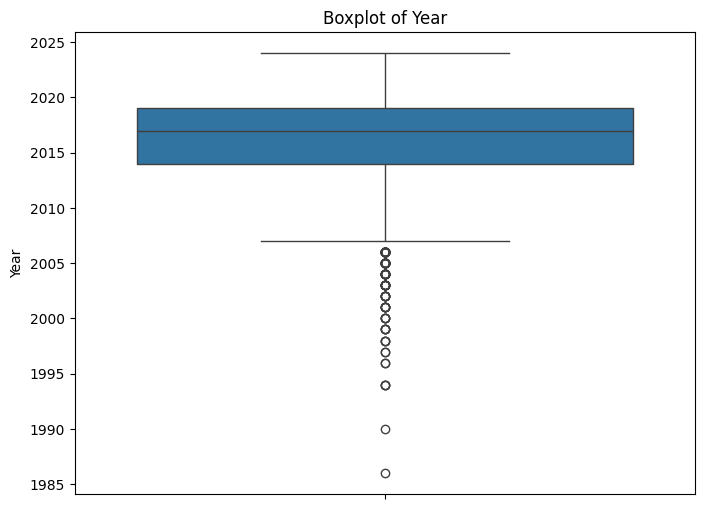

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Year'])
plt.title('Boxplot of Year')
plt.ylabel('Year')
plt.show()

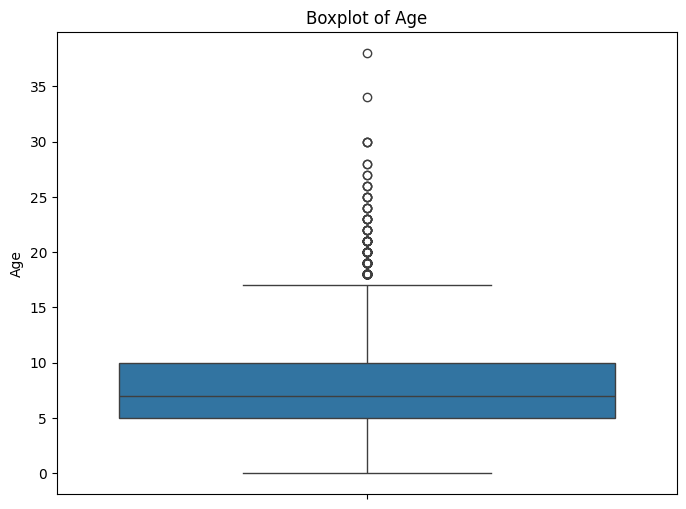

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

Berdasarkan visualisasi diatas, bulat bulat yang ada di visualisasi adalah outliers. Jadi tidak semua outliers harus ditangani, tergantung lagi pada tujuan analisisnya.

# **Eksplorasi Data (EDA)**

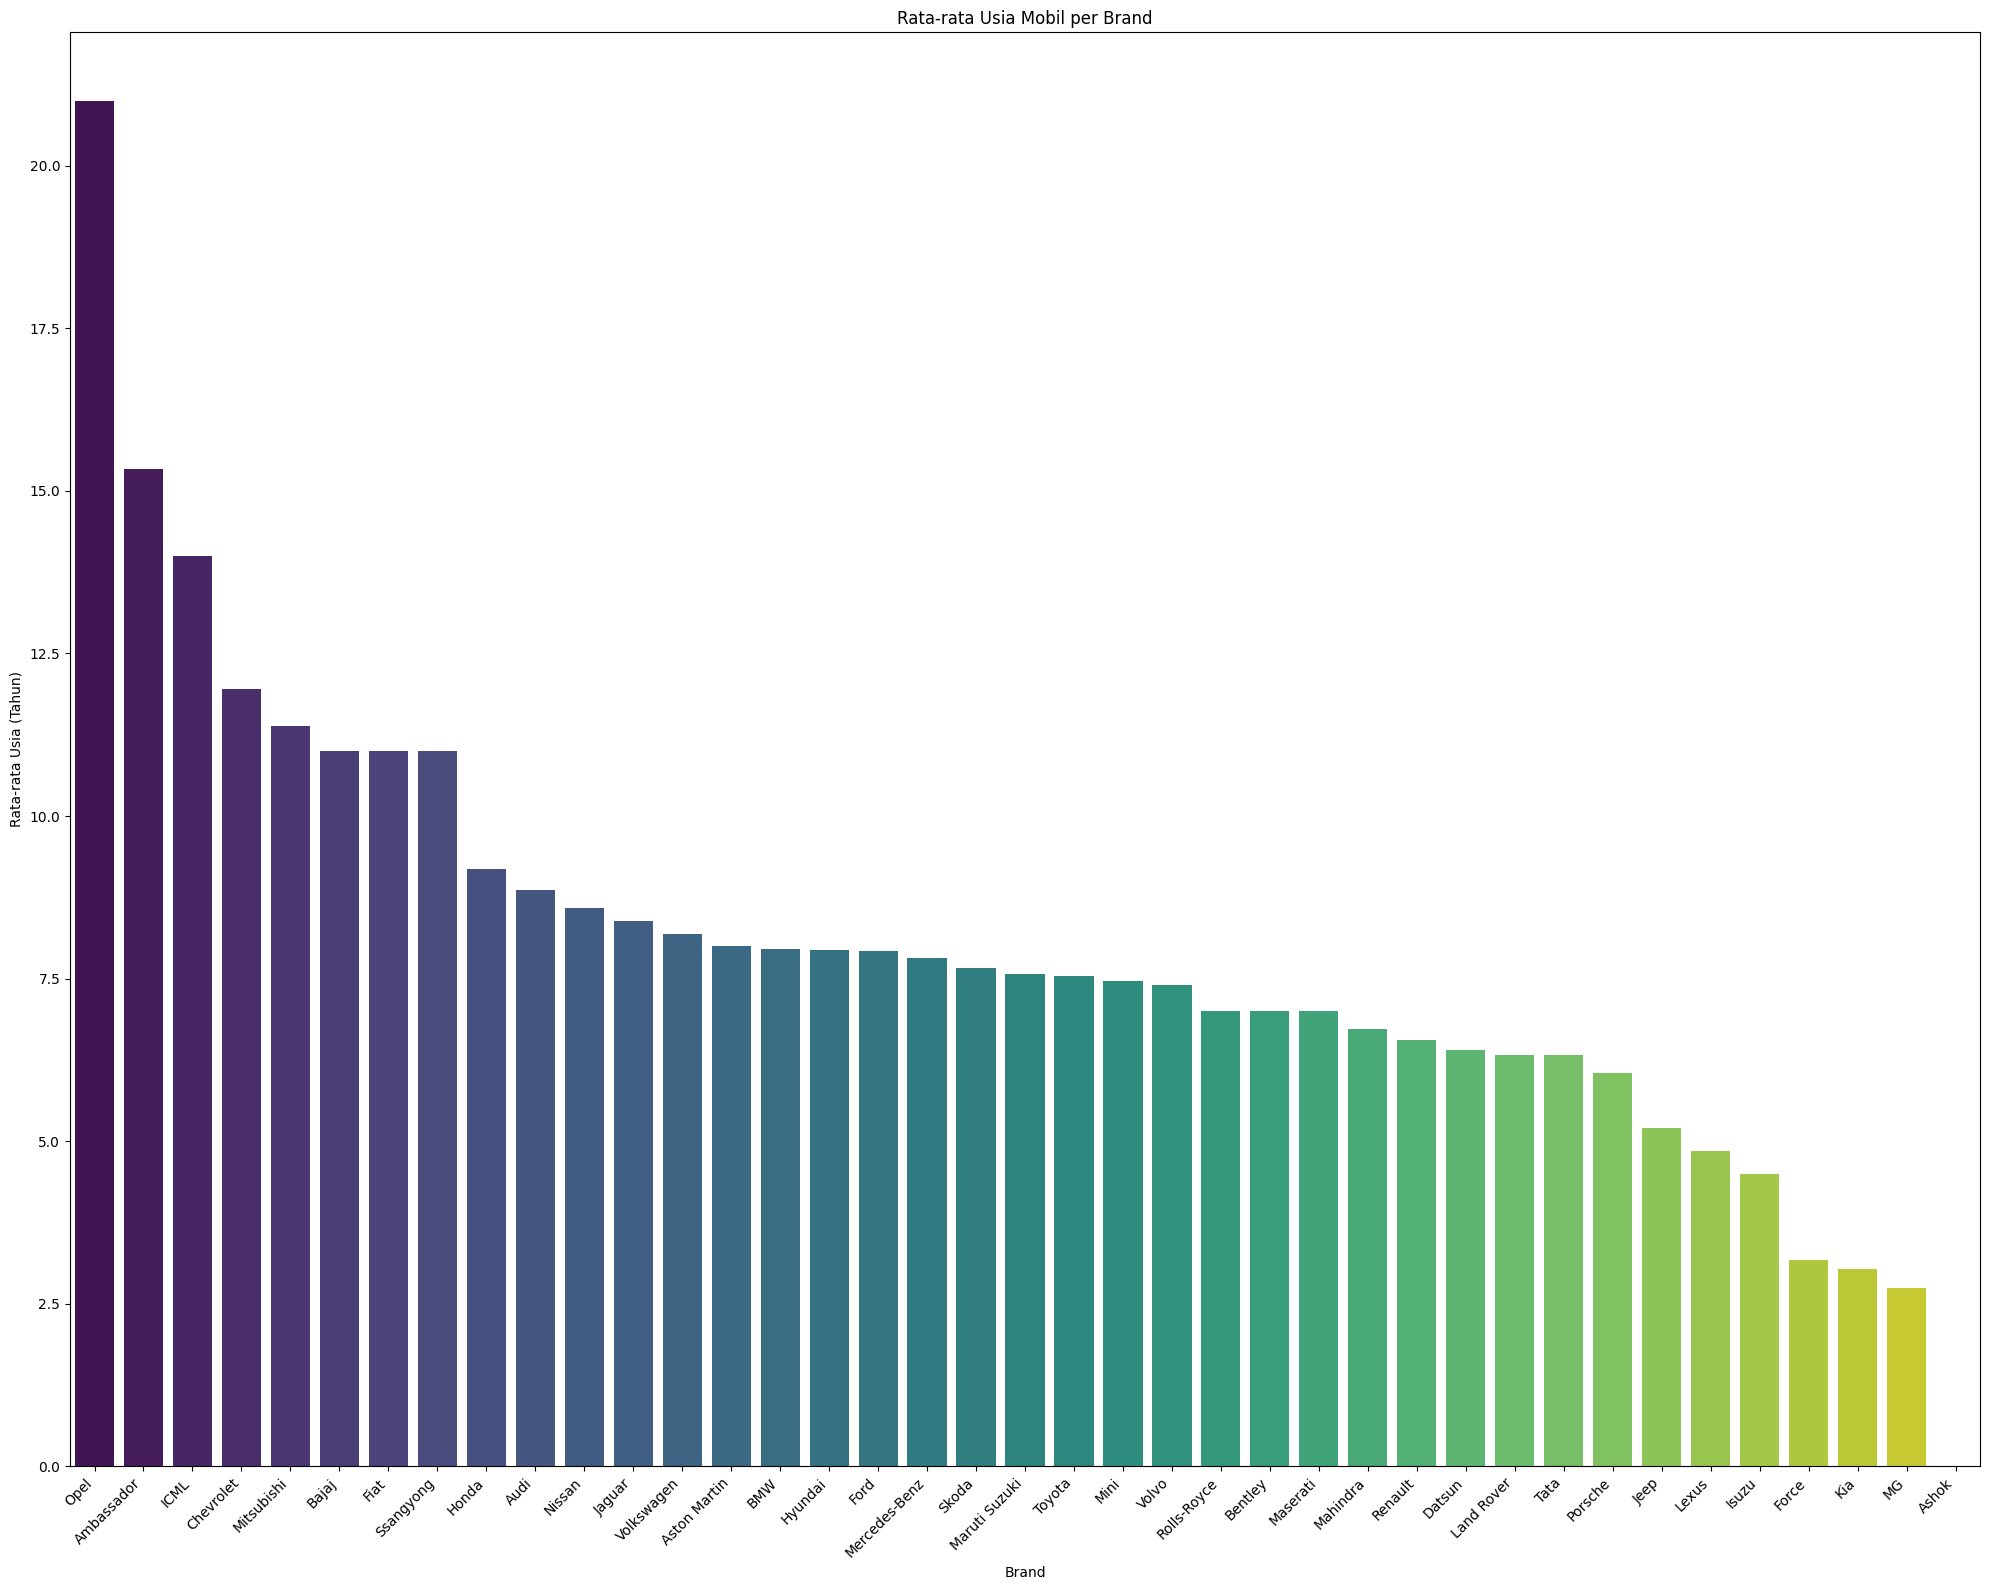

In [ ]:
usia_mobil = df.groupby('Brand')['Age'].mean().sort_values(ascending=False)

plt.figure(figsize=(20,16))
sns.barplot(
    x=usia_mobil.index,
    y=usia_mobil.values,
    palette='viridis',
    hue=usia_mobil.index,
    legend=False
)

plt.title('Rata-rata Usia Mobil per Brand')
plt.xlabel('Brand')
plt.ylabel('Rata-rata Usia (Tahun)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Aktivitas: Membandingkan rata rata usia brand mobil.

Tujuan: Mengidentifikasi brand mana yang memiliki rata rata mobil yang usianya tua dan usianya muda.

Visualisasi: Bar Chart.

Kesimpulan: Berdasarkan Data, Rata-rata usia mobil yang paling tua adalah dari brand Opel. Sedangkan rata-rata usia mobil yang paling muda adalah dari brand Ashok

## **Composition/Komposisi**

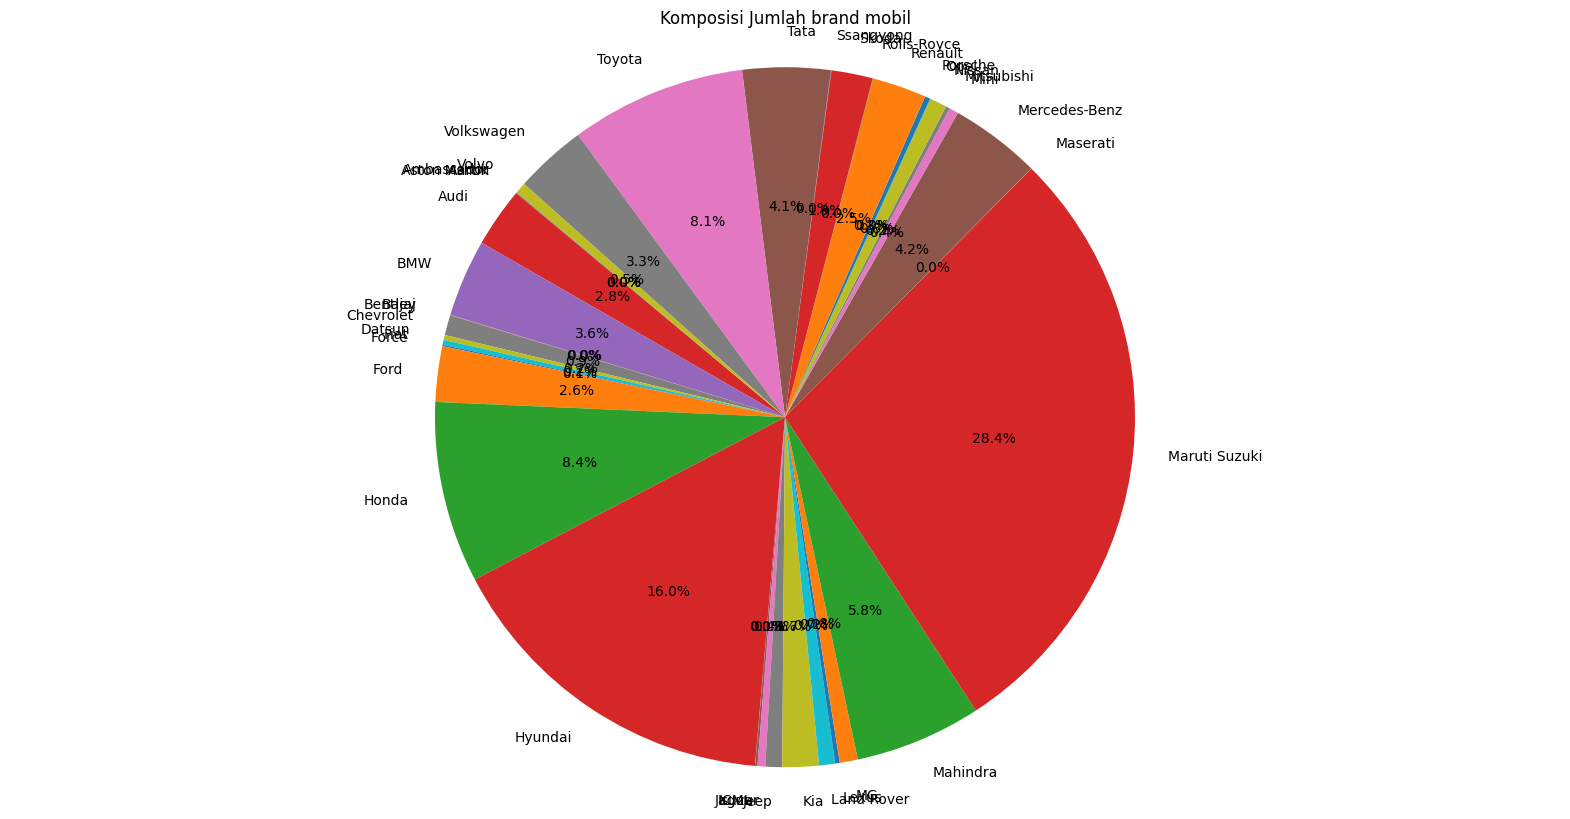

In [ ]:
komposisi_brand = df['Brand'].value_counts().sort_index()

plt.figure(figsize=(20,10))
plt.pie(
    komposisi_brand,
    labels=komposisi_brand.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Komposisi Jumlah brand mobil')
plt.axis('equal')
plt.show()

Aktivitas: Melihat proporsi atau persentase jumlah mobil berdasarkan brand.

Tujuan: Mengetahui brand apa yang paling mendominasi di dalam dataset.

Visualisasi: Pie Chart.

Kesimpulan: Berdasarkan Data, Brand mobil yang paling banyak dalam dataset ini adalah brand mobil Maruti Suzuki.

## **Distribution/Distribusi**

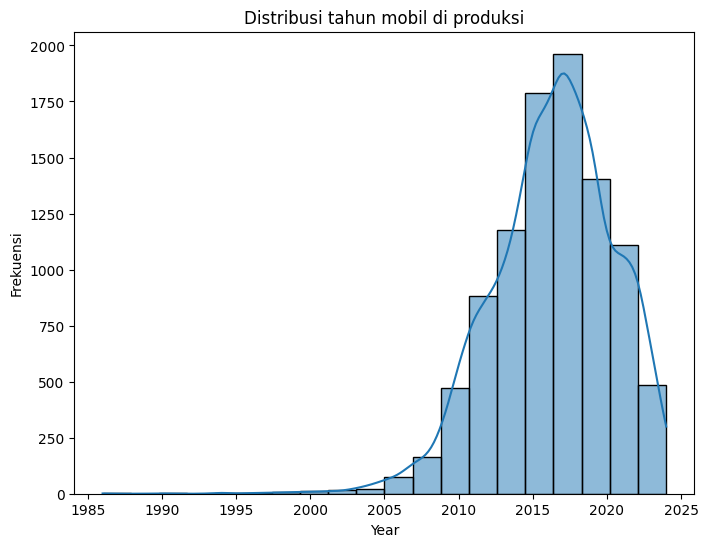

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Year'], bins=20, kde=True)

plt.title('Distribusi tahun mobil di produksi')
plt.xlabel('Year')
plt.ylabel('Frekuensi')
plt.show()

Aktivitas: Menganalisis distribusi produksi mobil pada kolom tahun.

Tujuan: Melihat apakah setiap tahun produksi mobil meningkat dalam dataset, serta mendeteksi adanya kecondongan (skewness) dalam data penjualan.

Visualisasi: Histogram.

Kesimpulan: Berdasarkan data, pada dataset ini distribusi mobil di produksi paling tinggi sekitar tahun 2015-2020

## **Relationship/Hubungan**

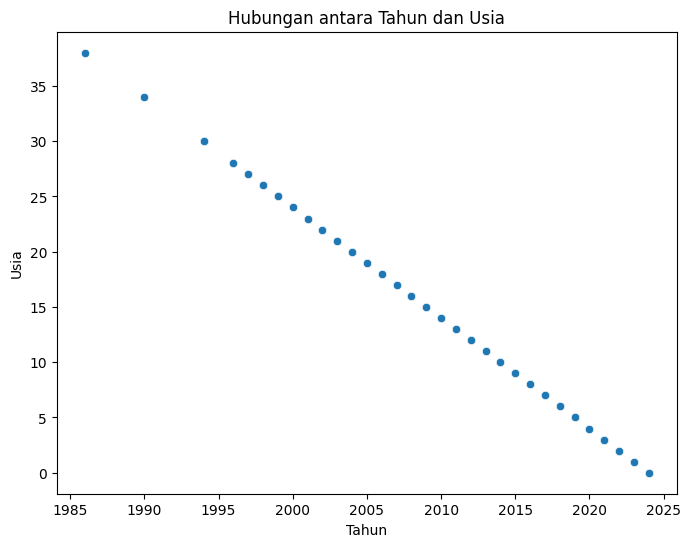

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Year', y='Age', data=df)

plt.title('Hubungan antara Tahun dan Usia')
plt.xlabel('Tahun')
plt.ylabel('Usia')
plt.show()

Aktivitas: Menganalisis korelasi antara Usia Mobil dan Tahun produksi mobil.

Tujuan: Mengetahui apakah Usia mobil mempengaruhi kapan Tahun produksi mobil dari brand tersebut.

Visualisasi: Scatterplot

Kesimpulan : Berdasarkan Data, jika tahun produksi mobil terhitung lama maka semakin tua juga usia mobil tersebut. Begitupun sebaliknya, semakin dekat tahun produksi maka semakin muda juga usia mobil tersebut.